In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from scipy.stats.distributions import chi2
import warnings
warnings.filterwarnings('ignore')

Assignment:

Your client is an economist working at a major credit card company.  She would like to identify factors that could potentially contribute to derogatory reports on a credit card applicant’s credit history.  The most common reasons for derogatory credit reports on an individual’s credit history include missed payments, bankruptcy, repossessions, and foreclosures.  Most individual reports will stay on someone’s credit history for up to seven years to ten years.

The client collected data from individual credit card applications and other background information the company uses to determine the suitability of issuing a credit card to the applicant.  You should use your understanding of this process in terms of possible causal relationships between variables to determine variables to include in your model.  That is, you should include all variables that can potentially influence the outcome of interest regardless of significance or predictive value.  You should not include variables that the outcome influences; if this occurs, explain in the methods section (along with your model selection strategy and reasoning) why you excluded those variables in terms of their relationship with the outcome.  There is no need to use model selection to determine variables to include because there are enough observations (rows) of data to support all the variables (columns) in the data.

As an economist, the client has some background in statistics and used a standard Poisson regression to model the data.  However, she is concerned that there may be too many zeros in the report variable (the number of derogatory reports) than would be in a true Poisson regression.  As such, she would like your expertise in modeling and interpreting the data for this purpose.  Search for a model that can handle count data with many zeros.  Compare this model with a standard GLM using a model fit metric, then choose one model to present in the main body of your report.  It is helpful to include other models in the appendix and you may decide to refer to those models to discuss the sensitivity of the model to your assumptions.  Make sure to clearly interpret your model in the results section.

Your conclusion should briefly re-explain your goal for the analysis and give a big picture of which variables are most associated with derogatory reports and which are probably not influential.  This section should not be technical and should be easy to understand.

The data, derogatory.csv, can be found on the glms directory on Github and Canvas.

Variables:

card - was the application for a credit card accepted?  The variables included contributed to determining this.

reports - number of derogatory reports

age -  applicant age in years at time of application

income - yearly income in 10,000 USD

share - ratio of monthly credit card expenditure to yearly income (generated from income and expenditure)

expenditure - average monthly credit card expenditure

owner - does the applicant own their homenumber of derogatory reports?

selfemp - is the individual self-employed?

dependents - number of dependents

months - number of months living at current address

majorcards - does the applicant have other major credit cards?

active - number of active credit accounts



In [2]:
# load the data
df = pd.read_csv('derogatory.csv')

# check the dataframe
df.head(20)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,yes,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,yes,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,yes,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,yes,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,yes,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,yes,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,yes,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,yes,3
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,yes,6
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,yes,18


In [3]:
# def souce of the graph
def add_sourcing(plt, source_string, fontsize='x-small'):
    """Add small sourcing note to lower-right of current plot
    
    We would be using the same arguments over and over to do this.
    So a quick function will make it simpler. Now we can simply call:
    
    add_sourcing(plt, 'Sources: James UM 2021 Fall STATS 504')
    
    Arguments:
        plt: matplotlib.pyplot interface alias (typically plt)
        source_string: text to include as an annotation on the resulting plot
        fontsize: font size specification pass to matplotlib. Can be a float or one of:
            {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
        
    Returns:
        an annotated plot
    """
    return plt.annotate(
        source_string, # text to use for the source annotation
        fontsize=fontsize, # font size specification passed to matplotlib
        xycoords="figure fraction", # specify x and y positions as % of the overall figure
        xy=(1, 0.01), # 100% to the right (x) and 1% to the top (y) means bottom right
        horizontalalignment='right', # the text will align appropriately for bottom right    
    )

In [4]:
df.shape

(1319, 12)

In [5]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,46.000000


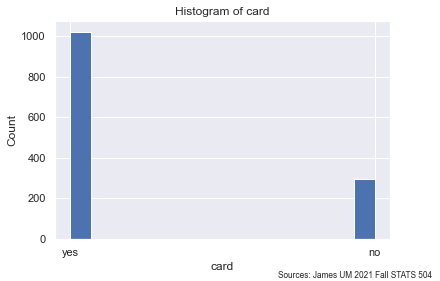

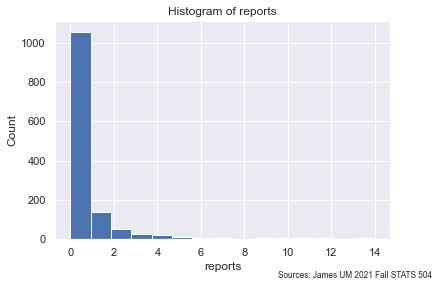

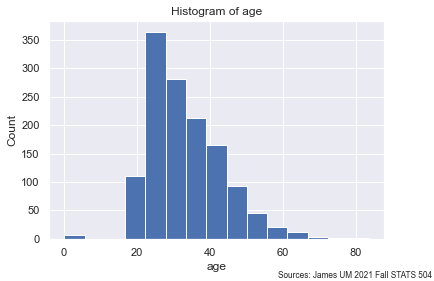

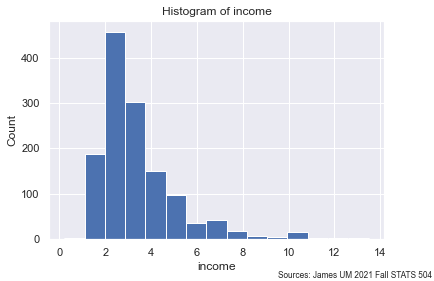

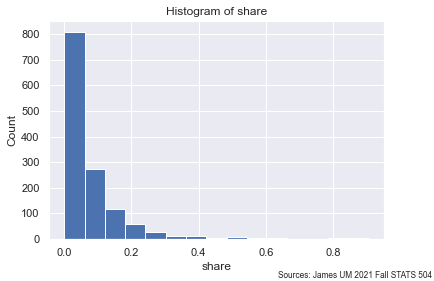

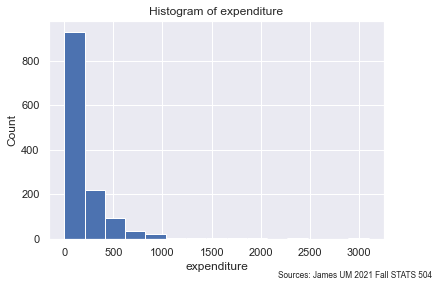

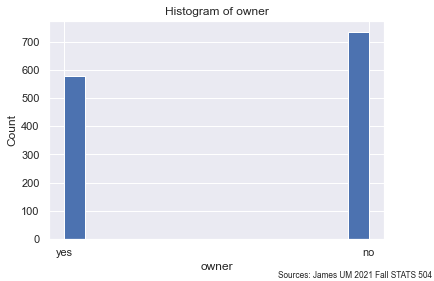

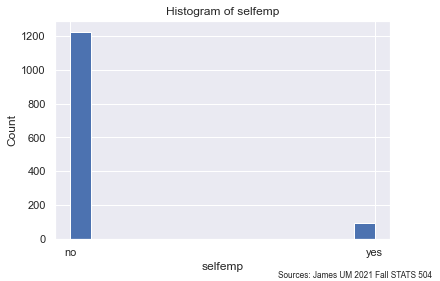

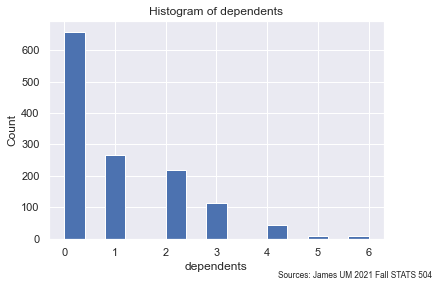

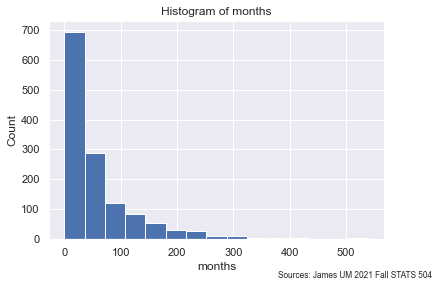

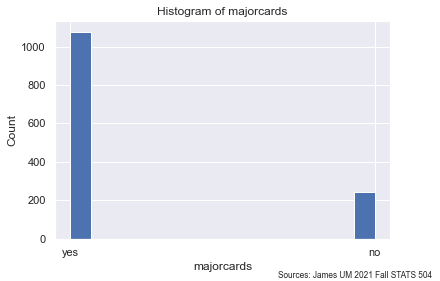

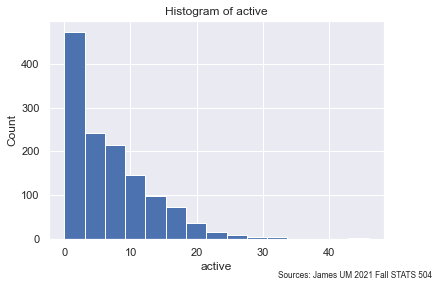

In [6]:
for var in df.columns:
    plt.hist(df[var],
             15)
    plt.xlabel('{}'.format(var))
    plt.ylabel('Count')
    plt.title('Histogram of {}'.format(var))
    # plt.axis([40, 160, 0, 0.03])
    plt.grid(True)
    add_sourcing(plt, 'Sources: James UM 2021 Fall STATS 504')
#     plt.xticks(np.arange(0, 15))
    plt.show()

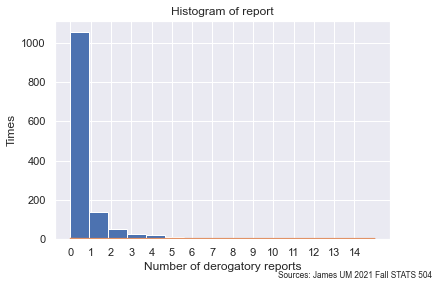

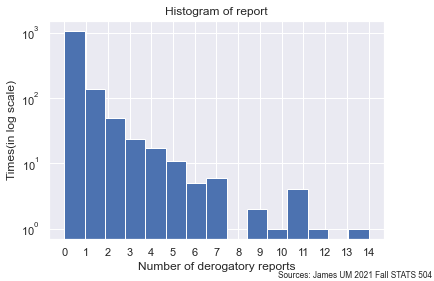

In [7]:
plt.hist(df['reports'],
         15)
kde = stats.gaussian_kde(df['reports'])
xx = np.linspace(0, 15, 1000)
plt.plot(xx,kde(xx))
plt.xlabel('Number of derogatory reports')
plt.ylabel('Times')
plt.title('Histogram of report')
plt.grid(True)
plt.xticks(np.arange(0, 15))
add_sourcing(plt, 'Sources: James UM 2021 Fall STATS 504')
plt.show()

# plot log scale
plt.hist(df['reports'],
         15)
plt.xlabel('Number of derogatory reports')
plt.ylabel('Times(in log scale)')
plt.xticks(np.arange(0, 15))
plt.yscale('log')
plt.title('Histogram of report')
plt.grid(True)
add_sourcing(plt, 'Sources: James UM 2021 Fall STATS 504')
plt.show()

In [8]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [9]:
# Possion formula
ps_formula = '''
    reports~ age + 
            C(card)+
            income+
            share+
            expenditure+
            C(owner)+
            C(selfemp)+
            dependents+
            months+
            C(majorcards)+
            active
'''

In [10]:
cov_type = ('HC1','HC2','HC3')
result = (None,None,None)
for cov in cov_type:
    poisson_model = smf.poisson(ps_formula, data=df).fit(cov_type=cov)
    print(poisson_model.summary())
    print('\n')

Optimization terminated successfully.
         Current function value: 0.728827
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:                reports   No. Observations:                 1319
Model:                        Poisson   Df Residuals:                     1307
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.3585
Time:                        10:50:59   Log-Likelihood:                -961.32
converged:                       True   LL-Null:                       -1498.5
Covariance Type:                  HC1   LLR p-value:                1.924e-223
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3816      0.291     -1.310      0.190      -0.952       0.189

In [11]:
poisson_model = smf.poisson(ps_formula, data=df).fit(cov_type='HC1')
poisson_model.summary()

Optimization terminated successfully.
         Current function value: 0.728827
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                reports   No. Observations:                 1319
Model:                        Poisson   Df Residuals:                     1307
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.3585
Time:                        10:51:06   Log-Likelihood:                -961.32
converged:                       True   LL-Null:                       -1498.5
Covariance Type:                  HC1   LLR p-value:                1.924e-223
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3816      0.291     -1.310      0.190      -0.952       0.189
C(card)[T.yes]          -2.7258      0.151    -18.111      0.000      -3.021      -2.431
C(owner)[T.yes]         -0.3833      0.161     -2.385      0.017      -0.698      -0.068
C(selfemp)[T.yes]       -0.1663      0.293     -0.568      0.570      -0.740       0.408
C(majorcards)[T.yes]     0.2448      0.171      1.428      0.153      -0.091       0.581
age                     -0.0002      0.007     -0.022      0.983      -0.015       0.014
income                   0.0357      0.047      0.761      0.447      -0.056       0.128
share                    0.7789      1.220      0.639      0.523      -1.612       3.170
expenditure              0.0004      0.000      1.150      0.250      -0.000       0.001
dependents               0.0263      0.062      0.427      0.670      -0.094       0.147
months                   0.0021      0.001      2.306      0.021       0.000       0.004
active                   0.0655      0.010      6.359      0.000       0.045       0.086
========================================================================================
"""

In [12]:
ps_md2 = sm.GLM.from_formula(ps_formula,
                            data = df,
                            family=sm.families.Poisson()).fit()
ps_md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1307
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -961.32
Date:                Wed, 08 Sep 2021   Deviance:                       1273.1
Time:                        10:51:07   Pearson chi2:                 1.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3816      0.182     -2.092      0.036      -0.739      -0.024
C(card)[T.yes]          -2.7258      0.127    -21.499      0.000      -2.974      -2.477
C(owner)[T.yes]         -0.3833      0.102     -3.759      0.000      -0.583      -0.183
C(selfemp)[T.yes]       -0.1663      0.150     -1.111      0.267      -0.460       0.127
C(majorcards)[T.yes]     0.2448      0.106      2.314      0.021       0.037       0.452
age                     -0.0002      0.005     -0.033      0.974      -0.010       0.009
income                   0.0357      0.027      1.312      0.190      -0.018       0.089
share                    0.7789      1.080      0.721      0.471      -1.338       2.896
expenditure              0.0004      0.000      1.516      0.129      -0.000       0.001
dependents               0.0263      0.036      0.730      0.465      -0.044       0.097
months                   0.0021      0.001      3.493      0.000       0.001       0.003
active                   0.0655      0.004     15.825      0.000       0.057       0.074
========================================================================================
"""

## For Poisson distribution, the expectation and variance are the same
$\mathbb{E} Y = var Y$ = $\lambda$

In [13]:
# checking Poisson mean and STD
ps_std = df.loc[:,'reports'].std()
ps_mean = df.loc[:,'reports'].mean()
print('Mean of reports is {:.2f} \nCovariance = {:.2f}'.format(ps_mean,ps_std**2))

Mean of reports is 0.46 
Covariance = 1.81


### From this we can see that expectation and variance of 'reports' are far off from equalization
$\mathbb{E} Y \neq var Y$

### Plot Poisson regression
$\hat{Y}=\hat{\beta}X^{T}$

In [31]:
# calculate y predicted value
X = sm.GLM.from_formula(ps_formula,
                            data = df,
                            family=sm.families.Poisson()).exog
beta = np.array(ps_md2.params)
y_pred = sm.GLM.from_formula(ps_formula,
                            data = df,
                            family=sm.families.Poisson()).predict(beta)

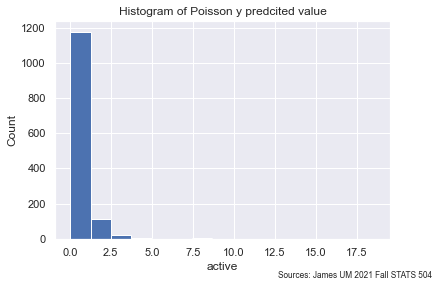

In [32]:
# plot
plt.hist(y_pred,
         15)
plt.xlabel('{}'.format(var))
plt.ylabel('Count')
plt.title('Histogram of {}'.format('Poisson y predcited value'))
plt.grid(True)
add_sourcing(plt, 'Sources: James UM 2021 Fall STATS 504')
plt.show()

Text(1, 0.01, 'Sources: James UM 2021 Fall STATS 504')

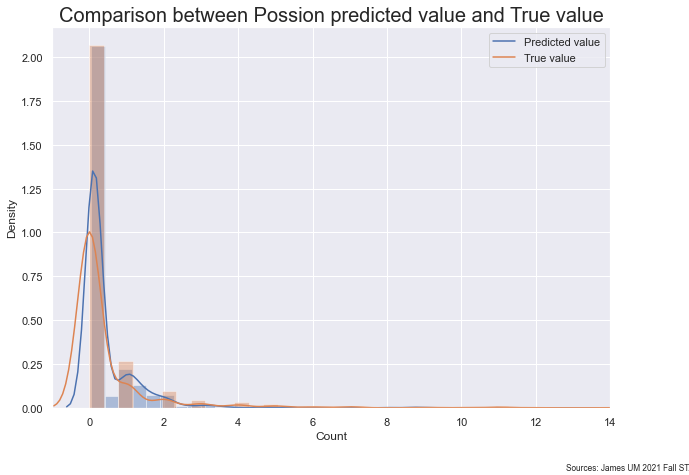

In [49]:
plt.figure(figsize=(10,7))
sns.distplot(y_pred, axlabel='Count',kde = True)
sns.distplot(df['reports'], axlabel='Count',kde = True)
plt.legend(labels=['Predicted value','True value'],\
          loc = 'best')
plt.xlim(-1,14)
plt.title('Comparison between Possion predicted value and True value', fontsize = 20)
add_sourcing(plt, 'Sources: James UM 2021 Fall STATS 504')

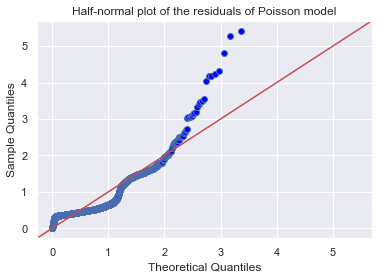

In [34]:
# check the residuals to see if the large deviance can be explained by an outlier:
residual = abs(ps_md2.resid_deviance) # calculate the absolute value of residuals
fig = sm.qqplot(residual, stats.halfnorm, line="45")
plt.title('Half-normal plot of the residuals of Poisson model')
plt.show()

## Investigate whether $\mu$ = var

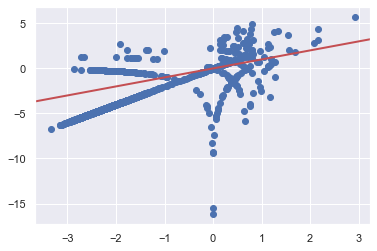

In [35]:
plt.scatter(np.log(y_pred),np.log((df['reports']-y_pred)**2))
plt.axline((0, 0), (1, 1), linewidth=2, color='r')

# Poisson with overdispersion

In [58]:
poisson_od = sm.GLM.from_formula(ps_formula,
                                data = df,
                                family = sm.families.Poisson())
ps_od_model = poisson_od.fit(scale="X2")
ps_od_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1307
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.4565
Method:                          IRLS   Log-Likelihood:                -660.02
Date:                Wed, 08 Sep 2021   Deviance:                       1273.1
Time:                        11:30:02   Pearson chi2:                 1.90e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3816      0.220     -1.733      0.083      -0.813       0.050
C(card)[T.yes]          -2.7258      0.153    -17.814      0.000      -3.026      -2.426
C(owner)[T.yes]         -0.3833      0.123     -3.115      0.002      -0.624      -0.142
C(selfemp)[T.yes]       -0.1663      0.181     -0.920      0.357      -0.520       0.188
C(majorcards)[T.yes]     0.2448      0.128      1.917      0.055      -0.005       0.495
age                     -0.0002      0.006     -0.027      0.978      -0.012       0.011
income                   0.0357      0.033      1.087      0.277      -0.029       0.100
share                    0.7789      1.304      0.597      0.550      -1.776       3.334
expenditure              0.0004      0.000      1.256      0.209      -0.000       0.001
dependents               0.0263      0.043      0.605      0.545      -0.059       0.111
months                   0.0021      0.001      2.894      0.004       0.001       0.003
active                   0.0655      0.005     13.112      0.000       0.056       0.075
========================================================================================
"""

Text(1, 0.01, 'Sources: James UM 2021 Fall STATS 504')

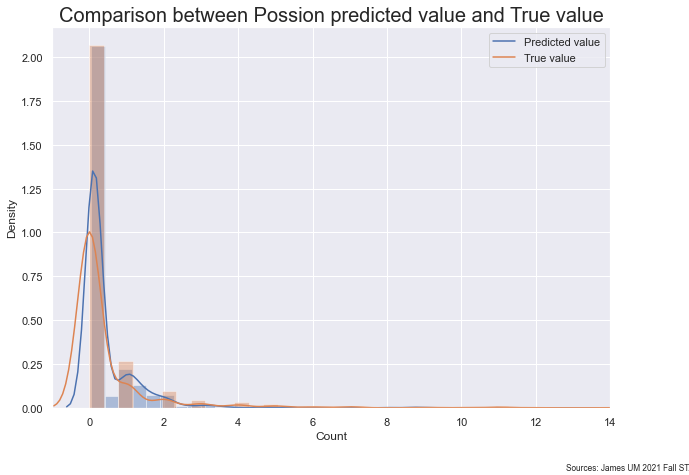

In [54]:
## plotting Poisson Overdispersion 
Xod = poisson_od.exog
beta_od = np.array(ps_od_model.params)
y_pred_od = poisson_od.predict(beta)
plt.figure(figsize=(10,7))
sns.distplot(y_pred_od, axlabel='Count',kde = True)
sns.distplot(df['reports'], axlabel='Count',kde = True)
plt.legend(labels=['Predicted value','True value'],\
          loc = 'best')
plt.xlim(-1,14)
plt.title('Comparison between Possion predicted value and True value', fontsize = 20)
add_sourcing(plt, 'Sources: James UM 2021 Fall STATS 504')

# Negative Binomial Regression

In [66]:
# Consider NegBin Regression
negbin = sm.GLM.from_formula(ps_formula,
                            data = df,
                            family=sm.families.NegativeBinomial())
nb_md = negbin.fit()
nb_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                reports   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1307
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -839.49
Date:                Wed, 08 Sep 2021   Deviance:                       729.15
Time:                        11:42:18   Pearson chi2:                 1.33e+03
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.9985      0.272     -3.671      0.000      -1.532      -0.465
C(card)[T.yes]          -2.9009      0.157    -18.511      0.000      -3.208      -2.594
C(owner)[T.yes]         -0.4341      0.149     -2.918      0.004      -0.726      -0.143
C(selfemp)[T.yes]       -0.0993      0.224     -0.442      0.658      -0.539       0.341
C(majorcards)[T.yes]     0.2138      0.160      1.332      0.183      -0.101       0.528
age                      0.0043      0.007      0.588      0.557      -0.010       0.018
income                   0.0776      0.041      1.908      0.056      -0.002       0.157
share                    1.9891      1.326      1.501      0.133      -0.609       4.587
expenditure              0.0002      0.000      0.474      0.635      -0.001       0.001
dependents               0.0057      0.052      0.109      0.913      -0.097       0.108
months                   0.0025      0.001      2.815      0.005       0.001       0.004
active                   0.1102      0.008     13.103      0.000       0.094       0.127
========================================================================================
"""

In [67]:
nb_model = smf.negativebinomial(ps_formula, data=df).fit(method='newton', cov_type="HC1")
nb_model.summary()

Optimization terminated successfully.
         Current function value: 0.635935
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                reports   No. Observations:                 1319
Model:               NegativeBinomial   Df Residuals:                     1307
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.2053
Time:                        11:42:26   Log-Likelihood:                -838.80
converged:                       True   LL-Null:                       -1055.5
Covariance Type:                  HC1   LLR p-value:                 4.994e-86
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.0225      0.279     -3.667      0.000      -1.569      -0.476
C(card)[T.yes]          -2.9070      0.156    -18.644      0.000      -3.213      -2.601
C(owner)[T.yes]         -0.4357      0.149     -2.915      0.004      -0.729      -0.143
C(selfemp)[T.yes]       -0.0893      0.266     -0.336      0.737      -0.610       0.432
C(majorcards)[T.yes]     0.2054      0.162      1.267      0.205      -0.112       0.523
age                      0.0044      0.007      0.640      0.522      -0.009       0.018
income                   0.0792      0.042      1.868      0.062      -0.004       0.162
share                    1.9817      1.514      1.309      0.191      -0.986       4.949
expenditure              0.0002      0.001      0.369      0.712      -0.001       0.001
dependents               0.0023      0.053      0.044      0.965      -0.102       0.106
months                   0.0026      0.001      2.893      0.004       0.001       0.004
active                   0.1120      0.011     10.595      0.000       0.091       0.133
alpha                    1.1929      0.175      6.821      0.000       0.850       1.536
========================================================================================
"""

alpha – This is the estimate of the dispersion parameter. The dispersion parameter alpha can be obtained by exponentiating /lnalpha. If the dispersion parameter equals zero, the model reduces to the simpler poisson model. If the dispersion parameter, alpha, is significantly greater than zero than the data are over dispersed and are better estimated using a negative binomial model than a poisson model.

https://stats.idre.ucla.edu/stata/output/negative-binomial-regression/

In [68]:
X = negbin.exog
beta = np.array(nb_md.params)
y_pred = negbin.predict(beta)

Text(1, 0.01, 'Sources: James UM 2021 Fall STATS 504')

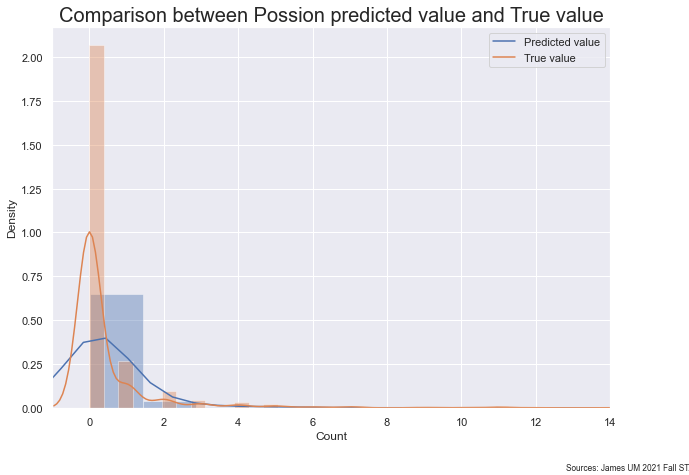

In [82]:
# Compare negbin with True value
plt.figure(figsize=(10,7))
sns.distplot(y_pred, bins = 80, axlabel='Count',kde = True)
sns.distplot(df['reports'], axlabel='Count',kde = True)
plt.legend(labels=['Predicted value','True value'],\
          loc = 'best')
plt.xlim(-1,14)
plt.title('Comparison between Possion predicted value and True value', fontsize = 20)
add_sourcing(plt, 'Sources: James UM 2021 Fall STATS 504')

# Zero Inflated Count Models